</br><div align="center"> <b> <font size="3" color='green'>cv2.HoughLines(image, d_rho, d_theta, threshold)</font></b> </div>
<b>image:</b> (required) source/input image<br>
<b>d_rho :</b>(required) Distance resolution of the accumulator in pixels.<br>
<b>d_theta:</b>(required) Angle resolution of the accumulator in radians.<br>
<b>threshold:</b>(required) Accumulator threshold parameter. Only those lines are returned that get enough votes <br>

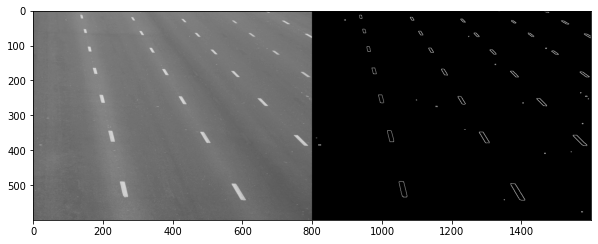

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./pic/highway.jpg')
img_gray = cv2.cvtColor(img, 6)
img_edge = cv2.Canny(img_gray, 100, 200)
plt.figure(figsize=(10,30))
plt.imshow(np.concatenate((img_gray, img_edge), 1), cmap='gray')

[[[-231.           2.5830872]]

 [[-284.           2.3561945]]

 [[-288.           2.3736477]]

 [[-276.           2.3561945]]

 [[-132.           2.9146998]]

 [[-244.           2.6179938]]

 [[-136.           2.8972466]]

 [[-126.           2.8972466]]

 [[-293.           2.3736477]]

 [[-303.           2.3911011]]

 [[-313.           2.1991148]]

 [[-218.           2.565634 ]]

 [[-317.           2.4085543]]

 [[-270.           2.6529005]]]


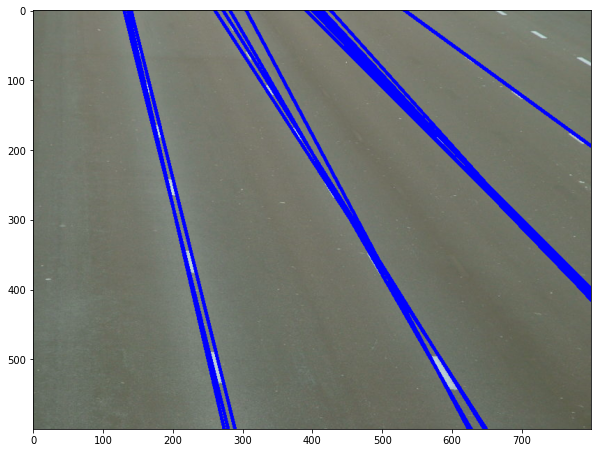

In [41]:
img_hough_line = img.copy()
lines = cv2.HoughLines(img_edge, 1, np.pi/180, 50)
rho_max = np.sqrt(img.shape[0]**2+img.shape[1]**2)
print(lines)
for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    s_th = np.sin(theta)
    c_th = np.cos(theta)
    x0 = rho*c_th
    y0 = rho*s_th
    pts1 = (np.int(x0-rho_max*s_th), np.int(y0+rho_max*c_th))
    pts2 = (np.int(x0+rho_max*s_th), np.int(y0-rho_max*c_th))
    cv2.line(img_hough_line, pts1, pts2, (0,0,255), 3)

plt.figure(figsize=(10,20))    
plt.imshow(img_hough_line)

</br><div align="center"> <b> <font size="3" color='green'>cv2.HoughLinesP(image, d_rho, d_theta, threshold, minLineLength, maxLineGap)</font></b> </div>
<b>image:</b> (required) source/input image<br>
<b>d_rho :</b>(required) Distance resolution of the accumulator in pixels.<br>
<b>d_theta:</b>(required) Angle resolution of the accumulator in radians.<br>
<b>threshold:</b>(required) Accumulator threshold parameter. Only those lines are returned that get enough votes <br>
<b>minLineLength:</b> Minimum line length. Line segments shorter than that are rejected. default value is 0 </br>
<b>maxLineGap:</b>	Maximum allowed gap between points on the same line to link them. default value is 0</br>

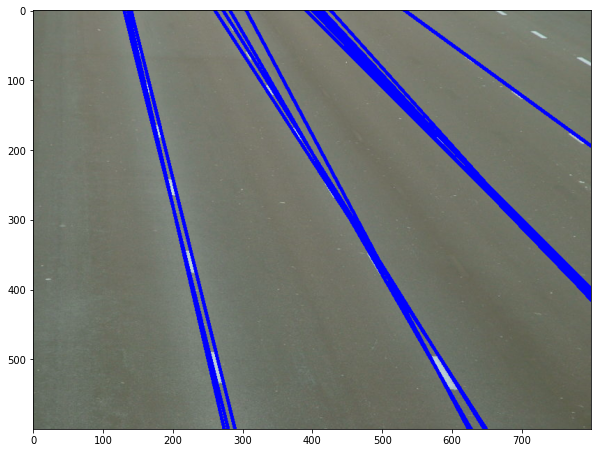

In [43]:
img_hough_linesP = img.copy()
lines = cv2.HoughLinesP(img_edge, 1, np.pi/180, 40)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_hough_linesP, (x1, y1), (x2, y2), (0,0,255), 3)
    
plt.figure(figsize=(10,20))    
plt.imshow(img_hough_line)

</br><div align="center"> <b> <font size="3" color='green'>cv2.HoughCircles(image, method, dp, minDist, param1, param2,minRadius,maxRadius)</font></b> </div>
<b>image:</b>	8-bit, single-channel, grayscale input image.</br>
<b>method:</b>	Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT.</br>
<b>dp:</b>	Inverse ratio of the accumulator resolution to the image resolution. </br>
<b>minDist:</b>	Minimum distance between the centers of the detected circles. </br>
<b>param1:</b>	First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector</br>
<b>param2:</b>	Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. </br>
<b>minRadius:</b> Minimum circle radius. </br>
<b>maxRadius:</b> Maximum circle radius. </br>

[920 501  76]
[1598  463   80]


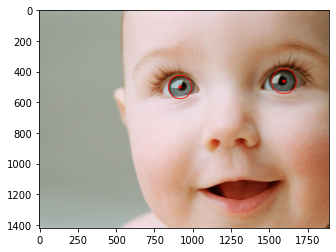

In [59]:
img = cv2.imread('./pic/baby.jpg')
img_gray = cv2.cvtColor(img, 6)
img_blur = cv2.medianBlur(img_gray,5)
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=200, param1=50, param2=30, minRadius=50, maxRadius=90)
# print(circles)
circles = np.uint16((circles))
for circle in circles[0]:
    print(circle)
    cv2.circle(img, (circle[0], circle[1]), circle[2], (0,0,255), 3)
    cv2.circle(img, (circle[0], circle[1]), 10, (0,0,255), -1)
    
plt.imshow(cv2.cvtColor(img, 4))